In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
# from stat import zscore
import matplotlib.pyplot as plt
import seaborn as sns

Getting dataset - Student Performance

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [112]:
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,NaN
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [113]:
df.shape

(1000, 8)

In [114]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [115]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [116]:
df.describe()

,math score,reading score,writing score
count,994.000000,994.000000,997.000000
mean,66.230382,69.482897,68.402207
std,16.054484,18.283165,18.123287
min,0.000000,11.000000,0.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.750000,79.000000
max,200.000000,400.000000,350.000000


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     6
reading score                  6
writing score                  3
dtype: int64

In [9]:
df['math score'].fillna(value=df['math score'].mean(),inplace=True)
df['math score']=df['math score'].fillna(value=df['math score'].mean())
# df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  6
writing score                  3
dtype: int64

In [118]:
df['math score'].fillna(value=df['math score'].mean(),inplace=True)
df['writing score'].fillna(value=df['writing score'].mean(),inplace=True)
df['reading score'].fillna(value=df['reading score'].mean(),inplace=True)
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [119]:
def detect(df,threshold=3):
    score = zscore(df)
    mask = np.abs(score)>threshold
    outliers = df[mask.any(axis=1)]
    return outliers

In [120]:
z_scores = zscore(df[['math score','reading score','writing score']])
outliers = detect(z_scores)
outliers.head()

,math score,reading score,writing score
7,3.360980,-1.453582,-1.625598
17,-3.014739,-2.057345,-2.233770
39,-3.514795,-0.740043,-0.630409
59,-4.139866,-2.880659,-3.228960
113,-4.077359,-0.630268,-0.796274


In [137]:
dfs = df[~df.index.isin(outliers)]
dfs.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.230382,69.482897,68.402207
std,16.006200,18.228178,18.096054
min,0.000000,11.000000,0.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,200.000000,400.000000,350.000000


In [135]:

dfs.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.230382,69.482897,68.402207
std,16.006200,18.228178,18.096054
min,0.000000,11.000000,0.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,200.000000,400.000000,350.000000


In [122]:
dfs['math score'].unique()

array([ 72.        ,  69.        ,  90.        ,  47.        ,
        76.        ,  71.        ,  88.        , 120.        ,
        64.        ,  38.        ,  58.        ,  40.        ,
        66.23038229,  78.        ,  50.        ,  18.        ,
        46.        ,  54.        ,  66.        ,  65.        ,
        44.        ,  74.        ,  73.        ,  67.        ,
        70.        ,  62.        ,  63.        ,  56.        ,
        97.        ,  81.        ,  75.        ,  10.        ,
        55.        ,  53.        ,  59.        ,  57.        ,
        82.        ,  77.        ,  33.        ,  52.        ,
         0.        ,  79.        ,  39.        ,  45.        ,
        60.        ,  61.        ,  41.        ,  49.        ,
        30.        ,  80.        ,  42.        ,  27.        ,
        68.        ,  85.        ,  98.        ,  87.        ,
         1.        ,  99.        ,  84.        ,  51.        ,
        91.        ,  83.        ,  89.        , 200.  

In [123]:
dfs['math score']

0      72.0
1      69.0
2      90.0
3      47.0
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math score, Length: 1000, dtype: float64

[]

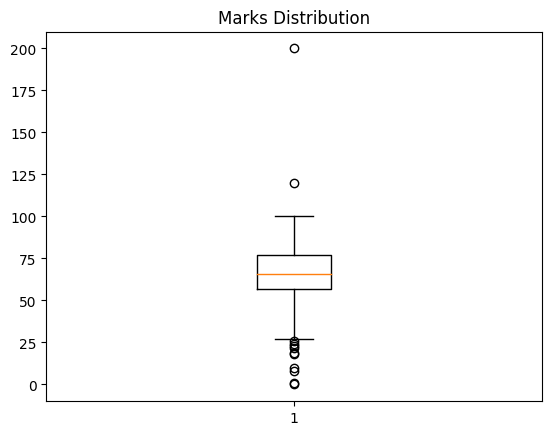

In [124]:
plt.boxplot(dfs['math score'])
plt.title("Marks Distribution")
plt.plot()

<Axes: xlabel='writing score', ylabel='Density'>

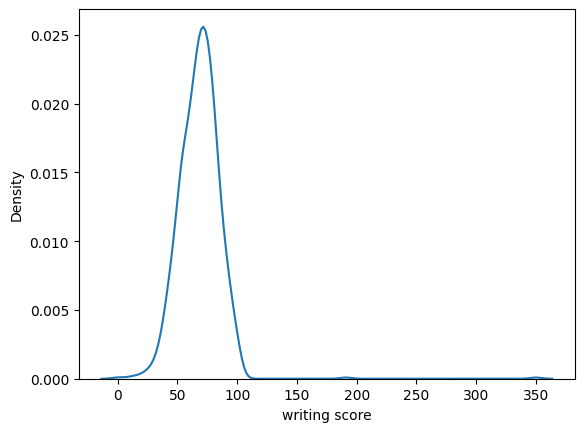

In [125]:
sns.kdeplot(dfs['writing score'])

C:\Users\Devanand\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='writing score', ylabel='Density'>

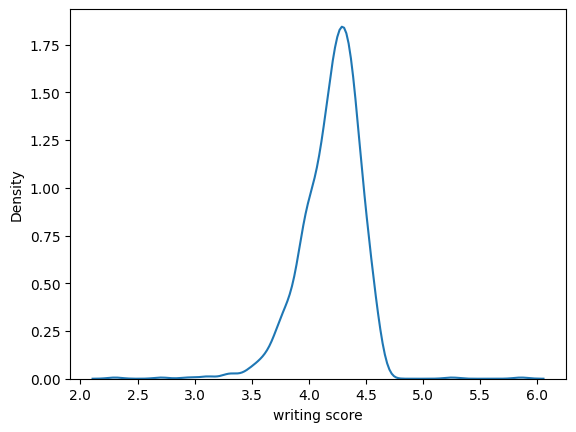

In [126]:

a = np.log(dfs['writing score'])

sns.kdeplot(a)

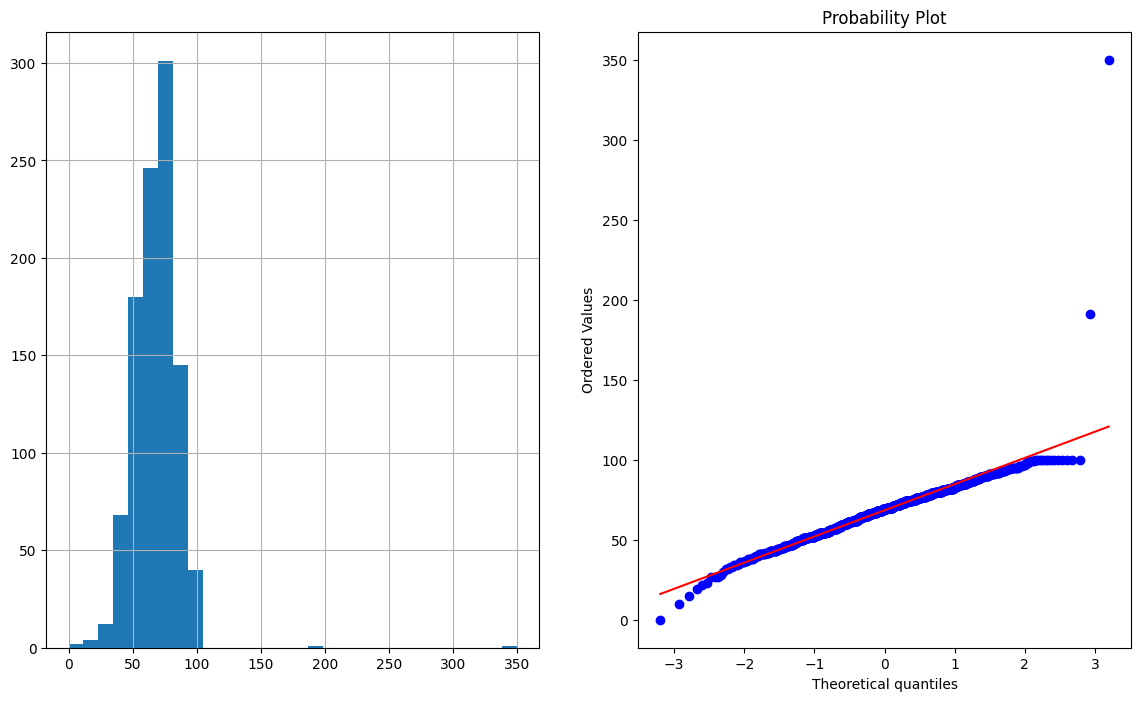

In [127]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
dfs['writing score'].hist(bins=30)

plt.subplot(1,2,2)
stats.probplot(dfs['writing score'], dist="norm", plot=plt)
plt.show()

C:\Users\Devanand\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


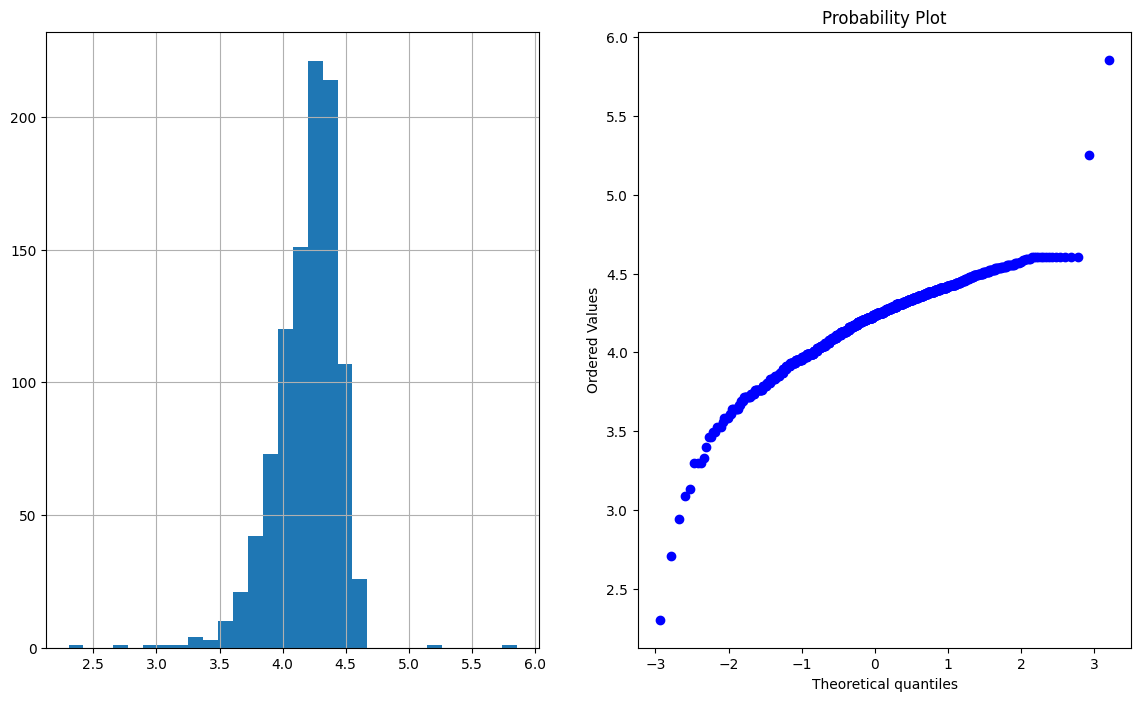

In [128]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
# dfs['writing log'].hist(bins=30)

a[np.isfinite(a)].hist(bins=30)

plt.subplot(1,2,2)
stats.probplot(a, dist="norm", plot=plt)
plt.show()

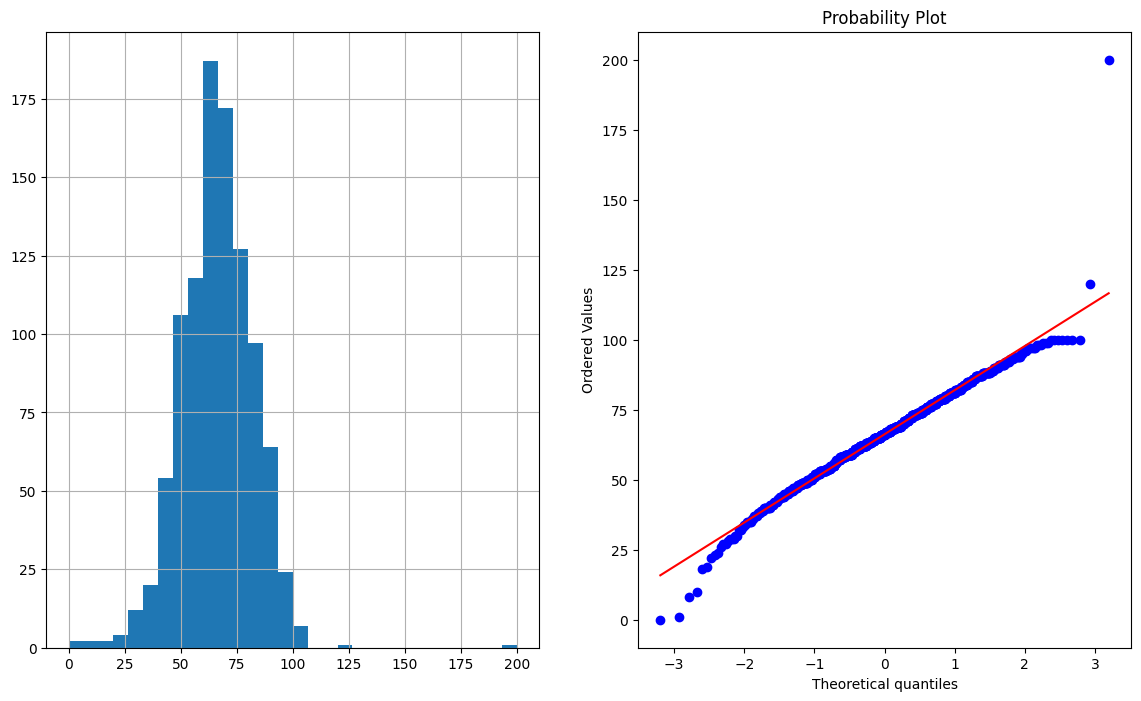

In [129]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
dfs['math score'].hist(bins=30)

plt.subplot(1,2,2)
stats.probplot(dfs['math score'], dist="norm", plot=plt)
plt.show()

<Axes: xlabel='math score', ylabel='Density'>

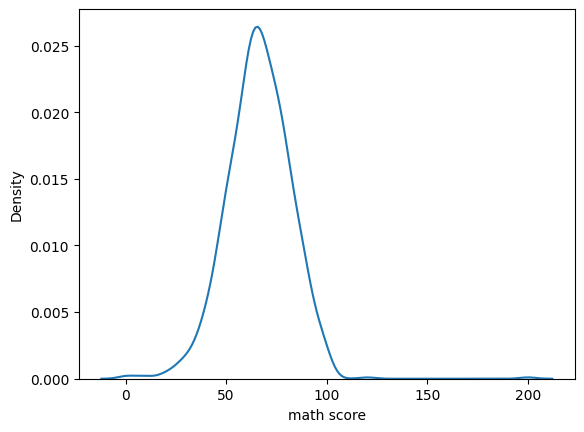

In [130]:
sns.kdeplot(dfs['math score'])



C:\Users\Devanand\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='math score', ylabel='Density'>

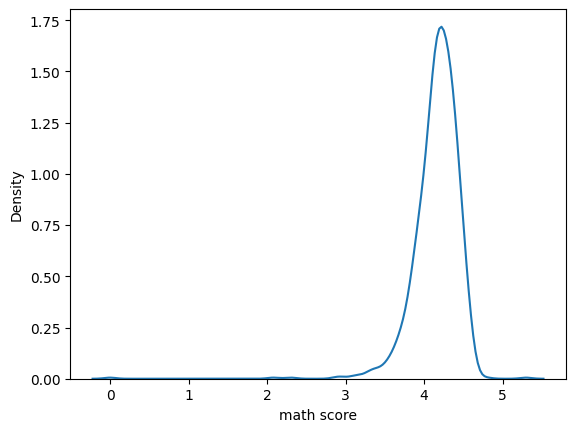

In [131]:
m = np.log(dfs['math score'])

m.skew(axis=0)

sns.kdeplot(m)

C:\Users\Devanand\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


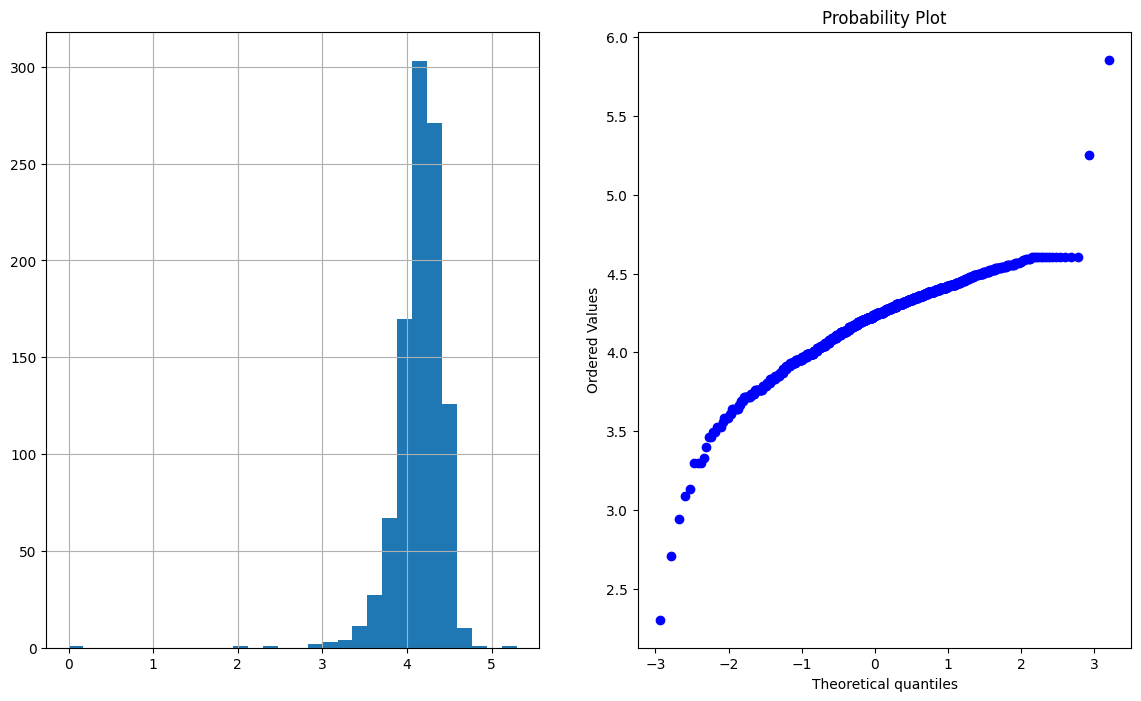

In [132]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
# dfs['writing log'].hist(bins=30)

m[np.isfinite(m)].hist(bins=30)

plt.subplot(1,2,2)
stats.probplot(a, dist="norm", plot=plt)
plt.show()